In [1]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder = "B:/"
csv_files = glob.glob(os.path.join(folder, "*.csv"))

print(f"📄 Найдено файлов: {len(csv_files)}")

📄 Найдено файлов: 7


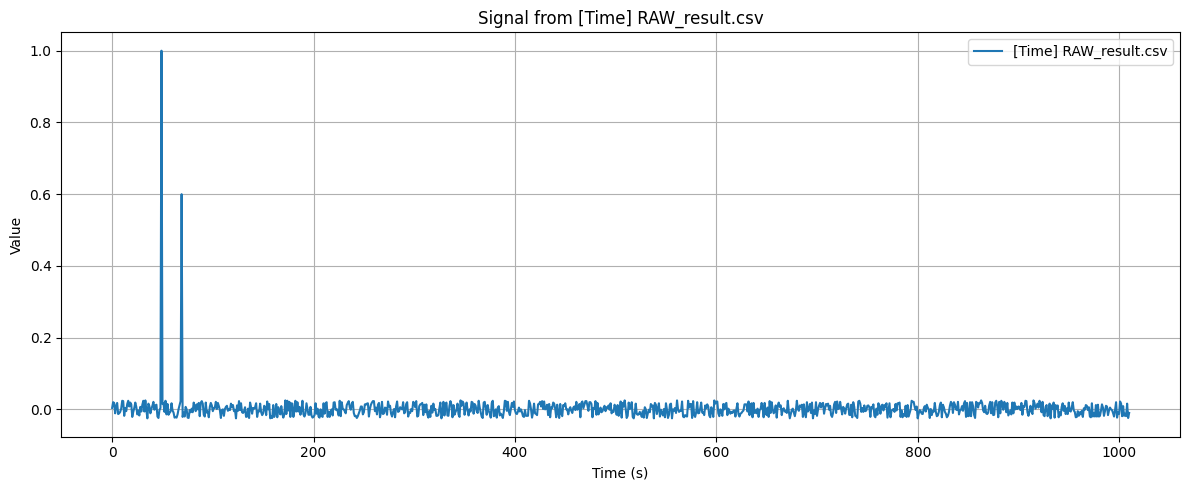

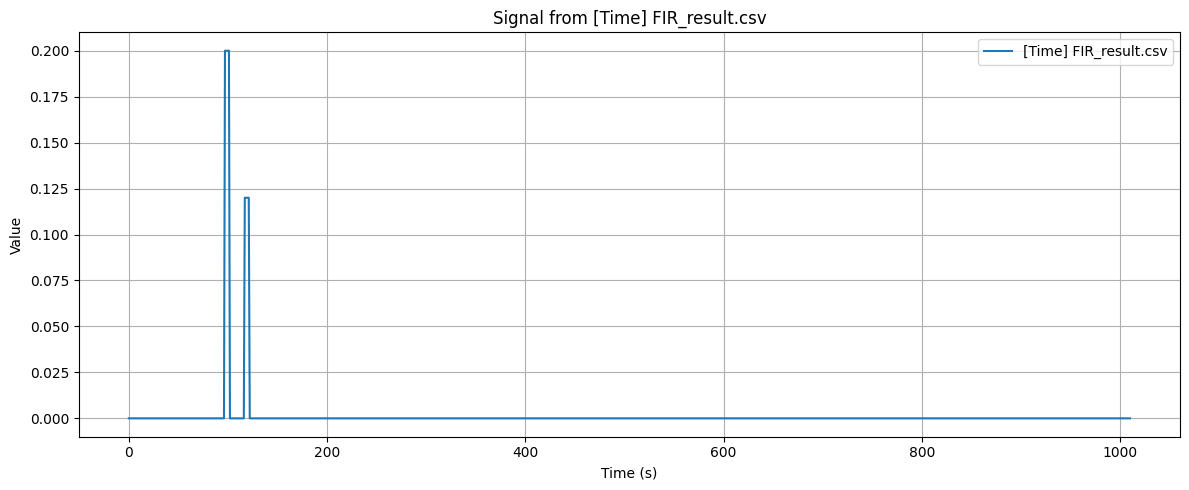

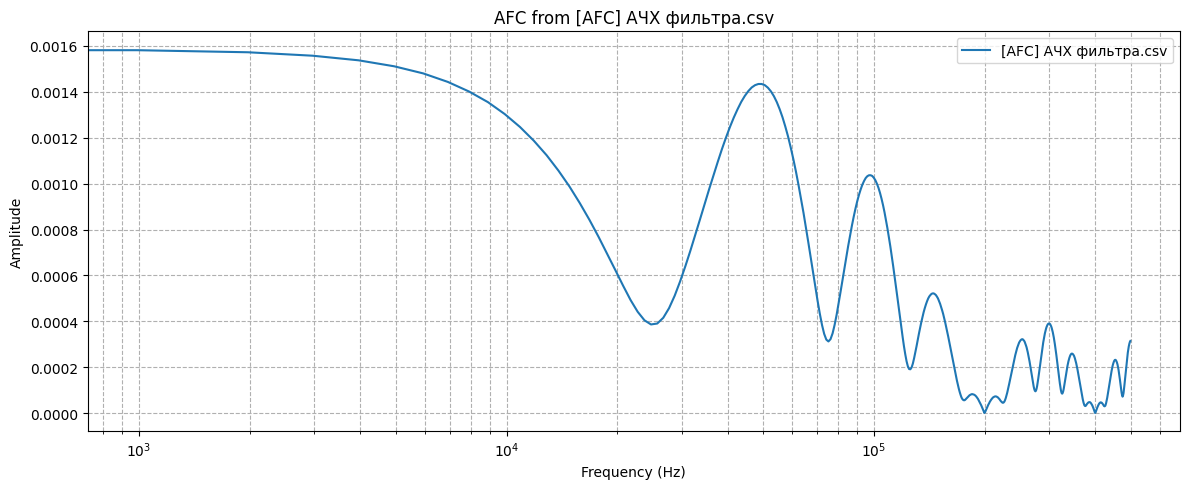

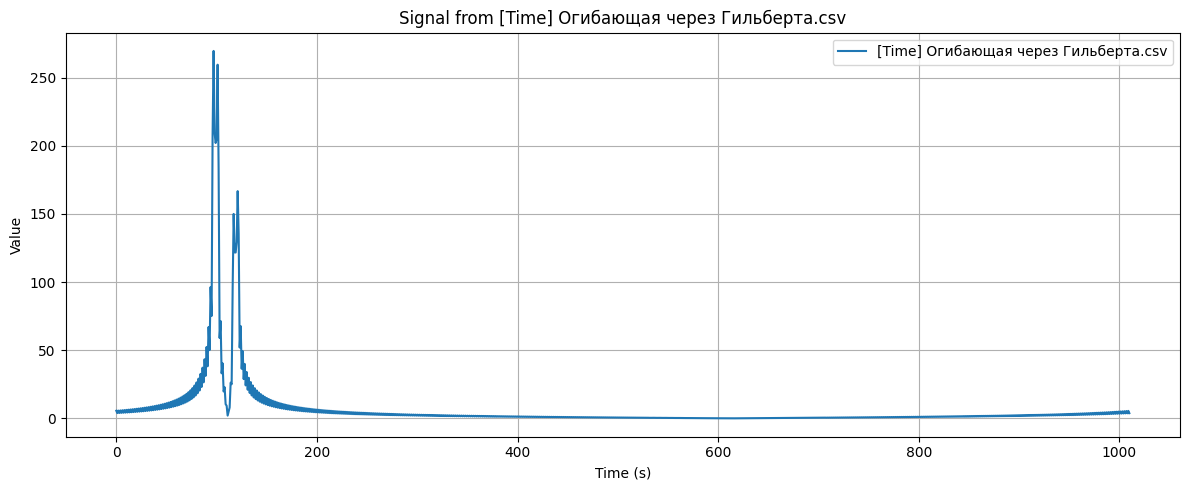

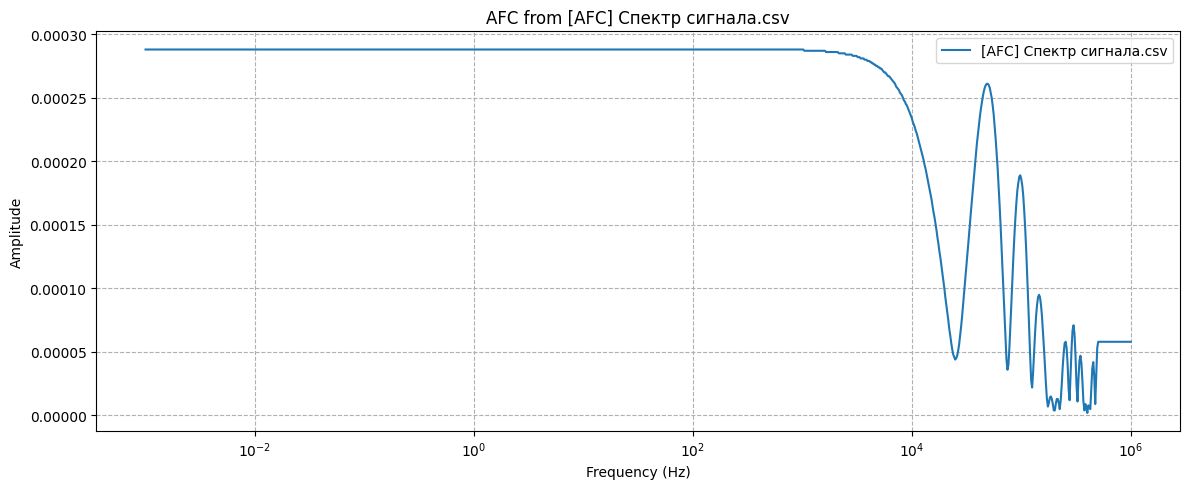

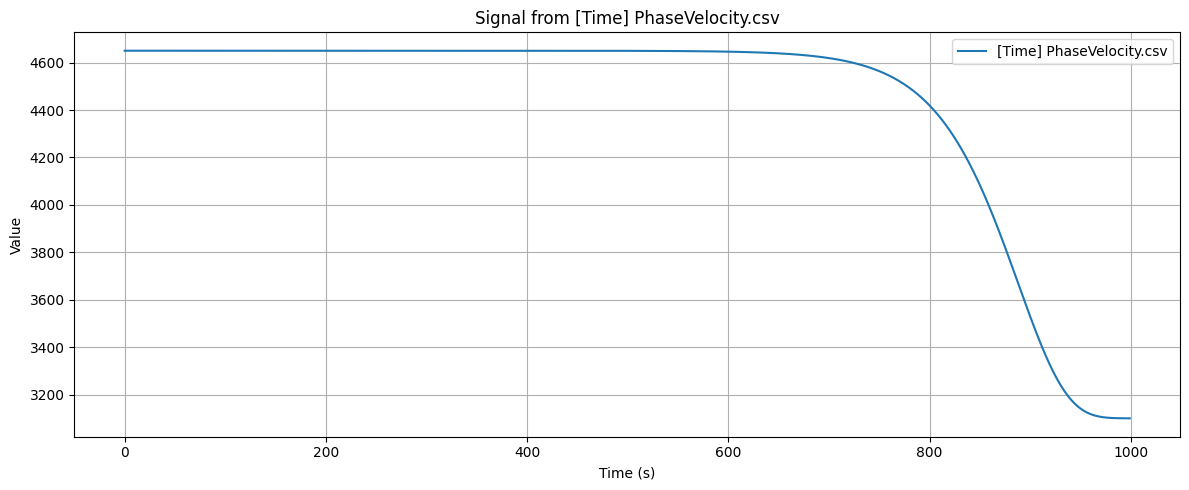

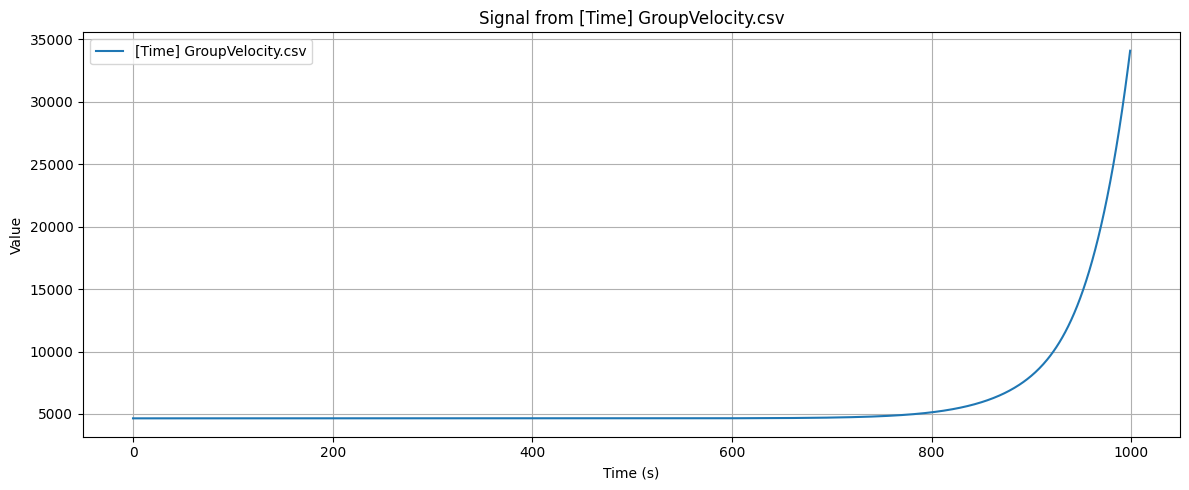

In [75]:
# Параметры
SAMPLE_RATE_HZ = 20_000_000  # Частота дискретизации для временных сигналов

def classify_file(file_name):
    """Определяет тип файла по имени"""
    file_name = file_name.lower()
    if "afc" in file_name:
        return "afc"
    if "time" in file_name:
        return "time"
    return None


def load_and_plot(file_path):
    file_name = os.path.basename(file_path)

    try:
        signal_type = classify_file(file_name)

        if signal_type in ["spectrum", "afc"]:
            # Чтение спектра или АЧХ
            df = pd.read_csv(file_path, header=None, names=["FrequencyHz", "Amplitude"])
            df = df.dropna()

            plt.figure(figsize=(12, 5))
            plt.plot(df["FrequencyHz"], df["Amplitude"], label=file_name)
            plt.xscale("log")  # 🔁 Логарифмическая шкала по оси X
            plt.title(f"{signal_type.upper()} from {file_name}")
            plt.xlabel("Frequency (Hz)")
            plt.ylabel("Amplitude")
            plt.grid(True, which="both", linestyle="--")
            plt.tight_layout()
            plt.legend()
            plt.show()

        else:
            # Временной сигнал
            df = pd.read_csv(file_path, header=None, names=["value"])
            df = df.dropna()

            num_samples = len(df)
            time_seconds = np.arange(num_samples)

            plt.figure(figsize=(12, 5))
            plt.plot(time_seconds, df["value"], label=file_name)
            plt.title(f"Signal from {file_name}")
            plt.xlabel("Time (s)")
            plt.ylabel("Value")
            plt.grid(True)
            plt.tight_layout()
            plt.legend()
            plt.show()

    except Exception as e:
        print(f"❌ Ошибка в файле {file_name}: {e}")


for file in csv_files:
    load_and_plot(file)

In [4]:
for file in csv_files:
    print(f"\n📄 Файл: {os.path.basename(file)}")

    try:
        df = pd.read_csv(file, sep=',', header=None)
        display(df)  # Покажет первые 5 строк как таблицу
    except Exception as e:
        print(f"❌ Ошибка при чтении: {e}")


📄 Файл: [Time] RAW_result.csv


,0,1
0,2025-05-12T12:26:38.091778Z,-0.015
1,2025-05-12T12:26:38.091778Z,0.006
2,2025-05-12T12:26:38.091778Z,0.002
3,2025-05-12T12:26:38.091778Z,-0.005
4,2025-05-12T12:26:38.091778Z,0.004
...,...,...
1061,2025-05-12T12:26:38.7934834Z,0.023
1062,2025-05-12T12:26:38.7934834Z,-0.025
1063,2025-05-12T12:26:38.7934834Z,0.013
1064,2025-05-12T12:26:38.7934834Z,-0.004



📄 Файл: [Time] FIR_result.csv


,0,1
0,2025-05-12T12:26:38.7957085Z,0.0
1,2025-05-12T12:26:38.7957085Z,0.0
2,2025-05-12T12:26:38.7957085Z,0.0
3,2025-05-12T12:26:38.7957085Z,0.0
4,2025-05-12T12:26:38.7957085Z,0.0
...,...,...
1061,2025-05-12T12:26:38.8045857Z,-0.0
1062,2025-05-12T12:26:38.8045857Z,-0.0
1063,2025-05-12T12:26:38.8045857Z,-0.0
1064,2025-05-12T12:26:38.8045857Z,-0.0



📄 Файл: [AFC] АЧХ фильтра.csv


,0,1
0,0.000000,0.001501
1,938.086304,0.001498
2,1876.172608,0.001491
3,2814.258912,0.001479
4,3752.345216,0.001461
...,...,...
528,495309.568480,0.000287
529,496247.654784,0.000292
530,497185.741088,0.000296
531,498123.827392,0.000298



📄 Файл: [Time] Огибающая через Гильберта.csv


,0,1
0,2025-05-12T12:26:38.8937247Z,5.96523
1,2025-05-12T12:26:38.8937247Z,4.01707
2,2025-05-12T12:26:38.8937247Z,6.08907
3,2025-05-12T12:26:38.8937247Z,4.10116
4,2025-05-12T12:26:38.8937247Z,6.21770
...,...,...
1061,2025-05-12T12:26:38.902227Z,3.78271
1062,2025-05-12T12:26:38.902227Z,5.73088
1063,2025-05-12T12:26:38.902227Z,3.85801
1064,2025-05-12T12:26:38.902227Z,5.84592



📄 Файл: [AFC] Спектр сигнала.csv


,0,1
0,0.001000,0.000288
1,0.001021,0.000288
2,0.001042,0.000288
3,0.001064,0.000288
4,0.001087,0.000288
...,...,...
995,920373.199662,0.000058
996,939664.831495,0.000058
997,959360.828709,0.000058
998,979469.667070,0.000058



📄 Файл: [Time] PhaseVelocity.csv


,0,1
0,2025-05-12T12:26:38.9866921Z,4649.99998
1,2025-05-12T12:26:38.9866921Z,4649.99998
2,2025-05-12T12:26:38.9866921Z,4649.99998
3,2025-05-12T12:26:38.9866921Z,4649.99998
4,2025-05-12T12:26:38.9866921Z,4649.99998
...,...,...
995,2025-05-12T12:26:38.9953982Z,3100.15603
996,2025-05-12T12:26:38.9953982Z,3100.12865
997,2025-05-12T12:26:38.9953982Z,3100.10565
998,2025-05-12T12:26:38.9953982Z,3100.08641



📄 Файл: [Time] GroupVelocity.csv


,0,1
0,2025-05-12T12:26:39.0496914Z,4650.00003
1,2025-05-12T12:26:39.0496914Z,4650.00003
2,2025-05-12T12:26:39.0496914Z,4650.00003
3,2025-05-12T12:26:39.0496914Z,4650.00003
4,2025-05-12T12:26:39.0496914Z,4650.00003
...,...,...
995,2025-05-12T12:26:39.0558815Z,31633.16125
996,2025-05-12T12:26:39.0558815Z,32230.94733
997,2025-05-12T12:26:39.0558815Z,32841.30493
998,2025-05-12T12:26:39.0558815Z,33464.49242
